In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from scipy.stats import norm, uniform
from copy import copy
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn import functional as F
from torch.autograd import Variable
import torch.nn as nn
from tqdm import tqdm_notebook as tqdm

In [170]:
BATCH_SIZE = 4096
EPOCHS = 100

In [8]:
X = pd.read_csv('mnist_data.csv').values[:, 1:]
y = pd.read_csv('mnist_target.csv').values[:, 1]
X = X / 255
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [171]:
class Data:
    def __init__(self, X, y):
        self.X = torch.DoubleTensor(X)
        self.y = torch.Tensor(y).long()
        
    def __getitem__(self, i):
        return self.X[i], self.y[i]
    
    def __len__(self):
        return self.X.shape[0]

In [172]:
dataset = Data(X_train, y_train)

In [173]:
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [174]:
class regression(nn.Module):
    def __init__(self, in_dim, out_dim=10, hd=32):
        super().__init__()        
        self.l = nn.Sequential(nn.Linear(in_dim, hd), 
                               nn.ReLU(), 
                               nn.Linear(hd, hd), 
                               nn.ReLU(), 
                               nn.Linear(hd, out_dim))
#         self.l = nn.Linear(in_dim, out_dim)
    def forward(self, x):
        out = self.l(x)
        return F.softmax(out, dim=-1)

In [175]:
model = regression(X_train.shape[1])
model.double()

regression(
  (l): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [176]:
optim = torch.optim.Adam(model.parameters(), lr=1e-4)

Loss: 29.930884672972265


Loss: 29.906620511222776


Loss: 29.873118723790345


Loss: 29.828127394871327


Loss: 29.770977598780156


Loss: 29.700154746876233


Loss: 29.61249069146438


Loss: 29.505223213640484


Loss: 29.374378490657403


Loss: 29.217390944459023


Loss: 29.032194963095176


Loss: 28.820146185810962


Loss: 28.58763167359317


Loss: 28.337745197733895


Loss: 28.075498809552737


Loss: 27.809227071237313


Loss: 27.53989498824965


Loss: 27.26792894932203


Loss: 26.993951192067357


Loss: 26.720887235713


Loss: 26.439874535421676


Loss: 26.164756129555684


Loss: 25.89249605652776


Loss: 25.628227308043908


Loss: 25.373490894423963


Loss: 25.128705905162036


Loss: 24.893650717089468


Loss: 24.675187910337424


Loss: 24.470105693763358


Loss: 24.27964341712516


Loss: 24.102642238676186


Loss: 23.940980005739632


Loss: 23.788253833263266


Loss: 23.652681707482905


Loss: 23.523246413570682


Loss: 23.404145538432093


Loss: 23.292555795612323


Loss: 23.19083473913718


Loss: 23.095182613892682


Loss: 23.00612241063245


Loss: 22.921424961465938


Loss: 22.843344236205894


Loss: 22.772510194481796


Loss: 22.701628855564028


Loss: 22.633267160899564


Loss: 22.570841524055353


Loss: 22.511930803824495


Loss: 22.456746302236763


Loss: 22.40119583964239


Loss: 22.348758325021073


Loss: 22.296874191480207


Loss: 22.24327810034195


Loss: 22.19009926646108


Loss: 22.123318068771894


Loss: 22.04186892586449


Loss: 21.95407951761308


Loss: 21.876760738235287


Loss: 21.808852836398426


Loss: 21.741685604586124


Loss: 21.680148923982987


Loss: 21.61907289896888


Loss: 21.564245181267914


Loss: 21.511875385047983


Loss: 21.46206960101298


Loss: 21.41458236652893


Loss: 21.369080195440567


Loss: 21.328589466893785


Loss: 21.288183569631308


Loss: 21.249197000053023


Loss: 21.215486911780324


Loss: 21.180100802958595


Loss: 21.147084083786844


Loss: 21.116924556225722


Loss: 21.08590833357847


Loss: 21.061206636432832


Loss: 21.034104733022108


Loss: 21.00757810946704


Loss: 20.984259246901942


Loss: 20.96071875044764


Loss: 20.938686008687824


Loss: 20.91856829150919


Loss: 20.896706231158984


Loss: 20.87744380739306


Loss: 20.85787366336035


Loss: 20.83918552555599


Loss: 20.822769038378464


Loss: 20.804151978074174


Loss: 20.788413810967818


Loss: 20.774403917349648


Loss: 20.758114421394097


Loss: 20.74331548330252


Loss: 20.730242059730173


Loss: 20.713453853899193


Loss: 20.70170873241483


Loss: 20.68699939153514


Loss: 20.675115640288602


Loss: 20.662665874980938


Loss: 20.650935247738005


Loss: 20.639004152499144


Loss: 20.62783700688099


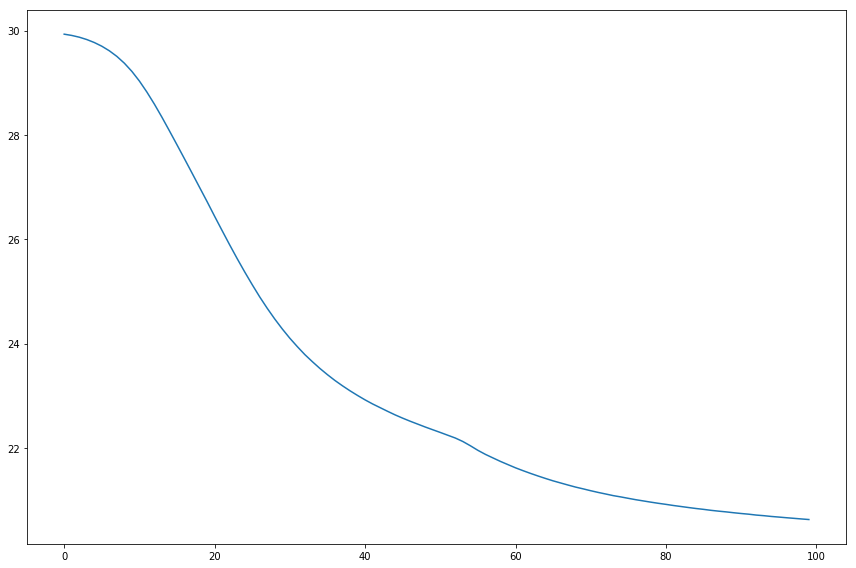

In [177]:
losses = []
for i in range(EPOCHS):
    avg_loss = 0
    for batch in tqdm(dataloader):
        X_, y_ = batch
        y_hat = model(X_)
        loss = F.cross_entropy(y_hat, y_.long())
        optim.zero_grad()
        loss.backward()
        optim.step()
        avg_loss += loss.item()
    losses.append(avg_loss)
    print("Loss:", avg_loss)

plt.figure(figsize=(12, 8))
plt.plot(list(range(EPOCHS)), losses)
plt.tight_layout()
plt.show()

In [178]:
def predict(X):
    return np.argmax(model(torch.DoubleTensor(X)).detach().numpy(), axis=1)

In [204]:
f"точность на тесте = {np.sum(predict(X_test) == y_test) / len(y_test)}"

'точность на тесте = 0.9057142857142857'

In [225]:
def fast_adversarial_example(dig, model, n=784, n_classes=10, eta=0.01, iters=24):
    y = torch.Tensor([dig]).long()
    x = torch.DoubleTensor([np.random.normal(loc=0, scale=0.01, size=784)])
    for _ in range(iters):
        x = Variable(x.data.clone(), requires_grad=True)
        y_hat = model(x)
        loss = F.cross_entropy(y_hat, y)
        model.zero_grad()
        loss.backward()
        grad = x.grad.data
        x = torch.clamp(x - eta*grad.sign(), 0, 1)
    return x

In [226]:
example = fast_adversarial_example(8, model)

In [227]:
ex = example.squeeze().detach().numpy()

In [228]:
alpha = 0.5

In [229]:
X_spoiled = np.maximum(X_test*(1-alpha), alpha*ex)

In [230]:
f"до атаки всего картинок класса 8 - {sum(predict(X_test) == 8)}"

'до атаки всего картинок класса 8 - 1732'

In [231]:
f"точность после атаки - {np.sum(predict(X_spoiled) == y_test) / len(y_test)}"

'точность после атаки - 0.5065142857142857'

In [232]:
f"после атаки картинок класса 8 - {sum(predict(X_spoiled) == 8)}"

'после атаки картинок класса 8 - 9931'